## BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.
#### Business Use Case
There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

#### Project Description
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.
About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 



You are provided with following 2 files:
1. train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
2. test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.
 
#### Dataset Attributes
Here is the description of all the variables:
* Variable: Definition
* ID: Unique client ID
* age: Age of the client
* job: Type of job
* marital: Marital status of the client
* education: Education level
* default: Credit in default.
* housing: Housing loan
* loan: Personal loan
* contact: Type of communication
* month: Contact month
* day_of_week: Day of week of contact
* duration: Contact duration
* campaign: number of contacts performed during this campaign to the client
* pdays: number of days that passed by after the client was last contacted
* previous: number of contacts performed before this campaign
* outcome: outcome of the previous marketing campaign

#### Output variable (desired target):
* Subscribed (target): has the client subscribed a term deposit? (YES/NO)

Dataset Link-
* https://github.com/FlipRoboTechnologies/ML-Datasets/tree/main/Bank%20Marketing
* https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Bank%20Marketing/termdeposit_test.csv
* https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv


---------------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_test = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv')
df_train = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')
df_test
df_train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


The dataset contains the details of customers with numeric and categorical values classifying the information about the customers who subscribed for the term deposit along with the ones who are still left to subscribe.


With the provided data, we need to assess the customers who are more likely to subscribe for the term deposit. We will need to assess the complete data.

In [3]:
df_test.shape
df_train.shape

(31647, 18)

In [4]:
df_test.columns
df_train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [5]:
df_test.columns.tolist()
df_train.columns.tolist()

['ID',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'subscribed']

In [6]:
df_test.dtypes
df_train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [7]:
df_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [8]:
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [9]:
#exploring the data for any missing values
df_test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [10]:
#exploring the data for any missing values
df_train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

#### Checking the number of total customer subscribed/unsubscribed

In [11]:
#Frequency of 'subscribed'
df_train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

<Axes: xlabel='subscribed', ylabel='count'>

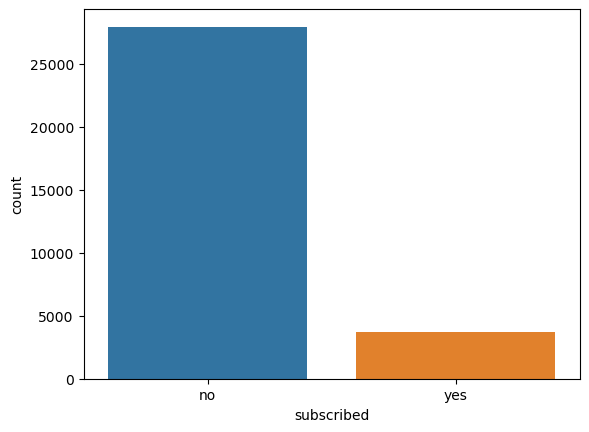

In [12]:
# Palcing the plot depicting 'subscribed' frequency
sns.countplot(data=df_train, x='subscribed')

In [13]:
#Normalizing the frequency table of 'Subscribed' variable
df_train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

From above classified data, we can see that only 3715 customers have subscribed for the term deposit out of 31647 of total customers.

In [14]:
#Analysing th 'Job' variable

#frequency table
df_train['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

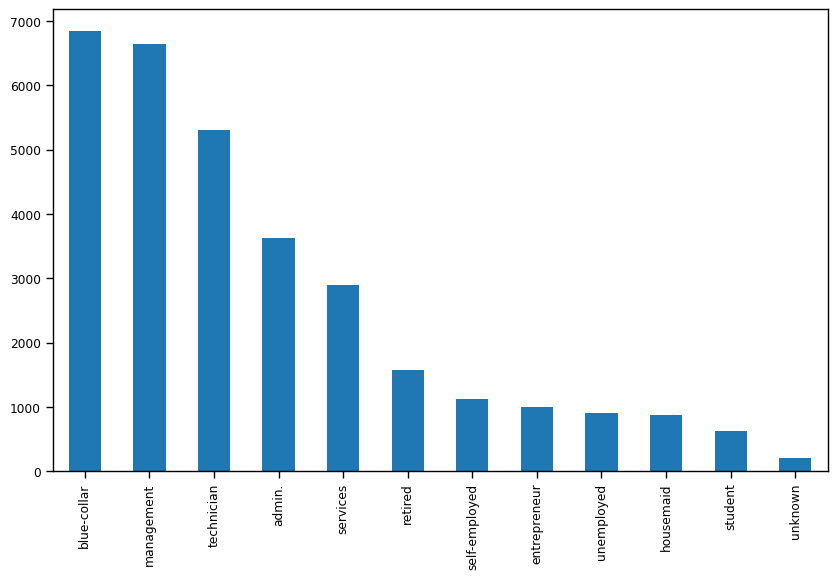

In [15]:
# Plotting the job frequency table
sns.set_context('paper')
df_train['job'].value_counts().plot(kind='bar', figsize=(10,6));

As per the above bar chart, its evidently visible that most of the cx belong from the group of blue-collar job variable and least from student group as they do not invest in term deposit plans.

In [16]:
df_train['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

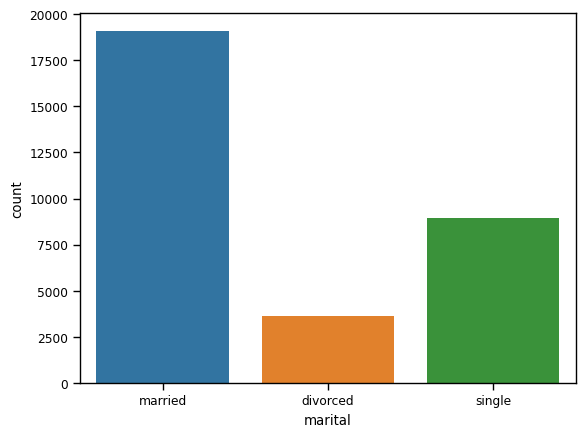

In [17]:
sns.countplot(data=df_train, x='marital');

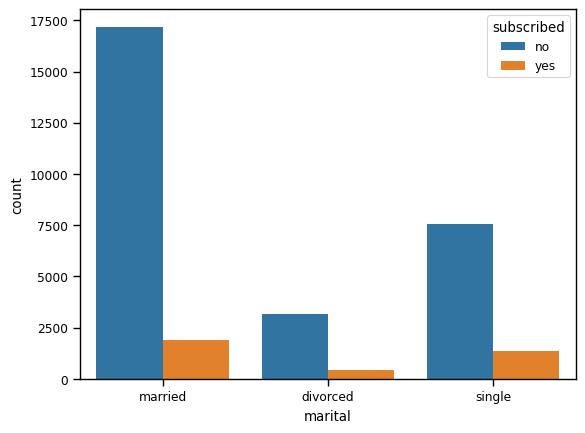

In [18]:
sns.countplot(data=df_train, x='marital', hue='subscribed');

#### Investigating 'Age' variable

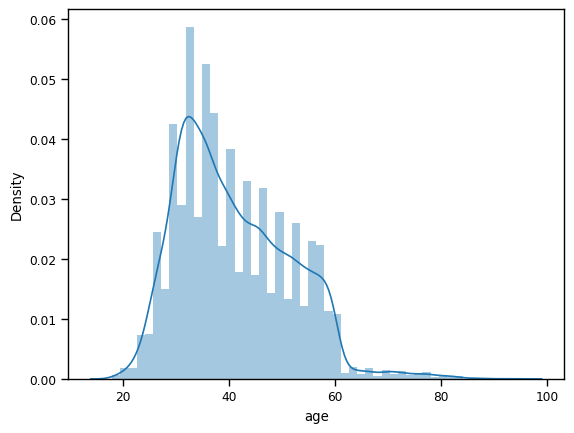

In [19]:
sns.distplot(df_train['age']);

As per the above graphical plot, maximum of the clients fall between the age group of 20-60.

#### Bivariate Analysis

In [20]:
#job vs subscribed
print(pd.crosstab(df_train['job'],df_train['subscribed']))

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


In [21]:
job = pd.crosstab(df_train['job'],df_train['subscribed'])
job_norm = job.div(job.sum(1).astype(float), axis=0)

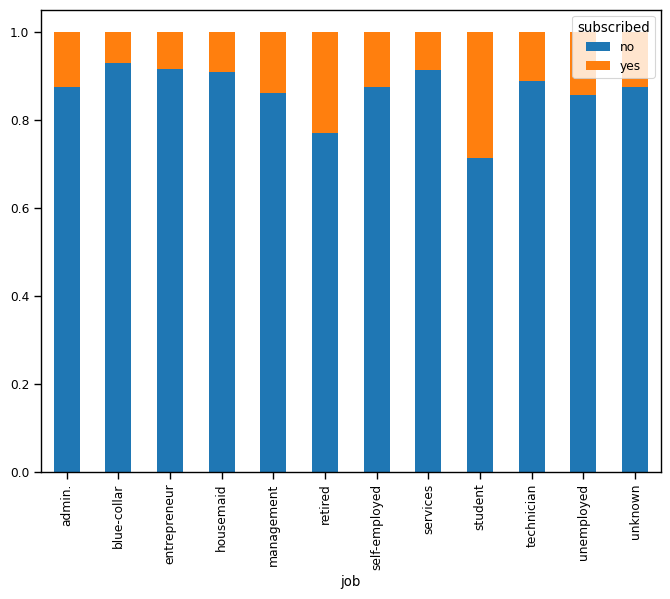

In [22]:
job_norm.plot.bar(stacked=True,figsize=(8,6));

The above data set shows that the maximum number of subscribers are from the retired and student group, which exhibits the possibility that the number of students may be less than that of other professional groups, as students generally do not opt ​​for long-term insurance plans. term.

In [23]:
#Marital status vs subscribed
pd.crosstab(df_train['marital'], df_train['subscribed'])

subscribed,no,yes
marital,,
divorced,3185,445
married,17176,1919
single,7571,1351


In [24]:
marital = pd.crosstab(df_train['marital'], df_train['subscribed'])
marital_norm = marital.div(marital.sum(1).astype(float), axis=0)
marital_norm

subscribed,no,yes
marital,,
divorced,0.877410,0.122590
married,0.899502,0.100498
single,0.848577,0.151423


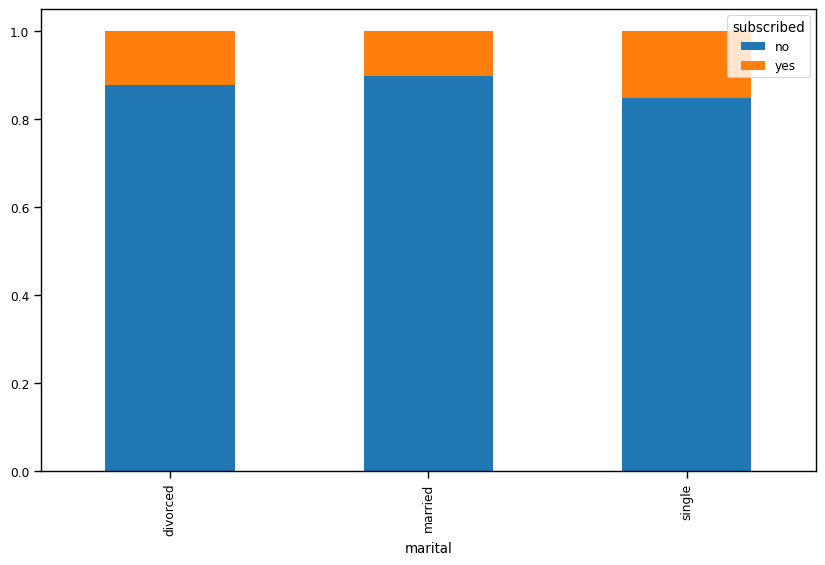

In [25]:
marital_norm.plot.bar(stacked=True, figsize=(10,6));

The above analytical data shows that married status does not infer much impact on subscription.

In [26]:
#default vs subscription
pd.crosstab(df_train['default'], df_train['subscribed'])

subscribed,no,yes
default,,
no,27388,3674
yes,544,41


In [27]:
dflt = pd.crosstab(df_train['default'], df_train['subscribed'])
dflt_norm = dflt.div(dflt.sum(1).astype(float), axis=0)
dflt_norm

subscribed,no,yes
default,,
no,0.881720,0.118280
yes,0.929915,0.070085


<Axes: xlabel='default'>

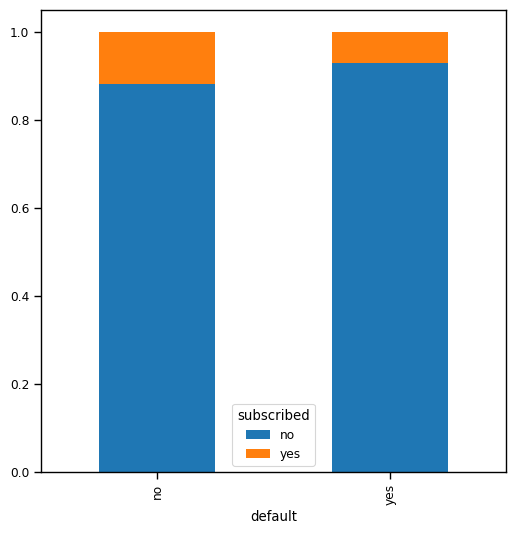

In [28]:
dflt_norm.plot.bar(stacked=True, figsize=(6,6))

This research indicates that customers with no previous default are more likely to take out a term deposit as compared to customers with a history of previous default.

In [29]:
# Converting the target variables into 0s and 1s

df_train['subscribed'].replace('no', 0,inplace=True)
df_train['subscribed'].replace('yes', 1,inplace=True)
df_train['subscribed']

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

In [30]:
#Correlation matrix

tc = df_train.corr()
tc

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.296663
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.296663,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


<Axes: >

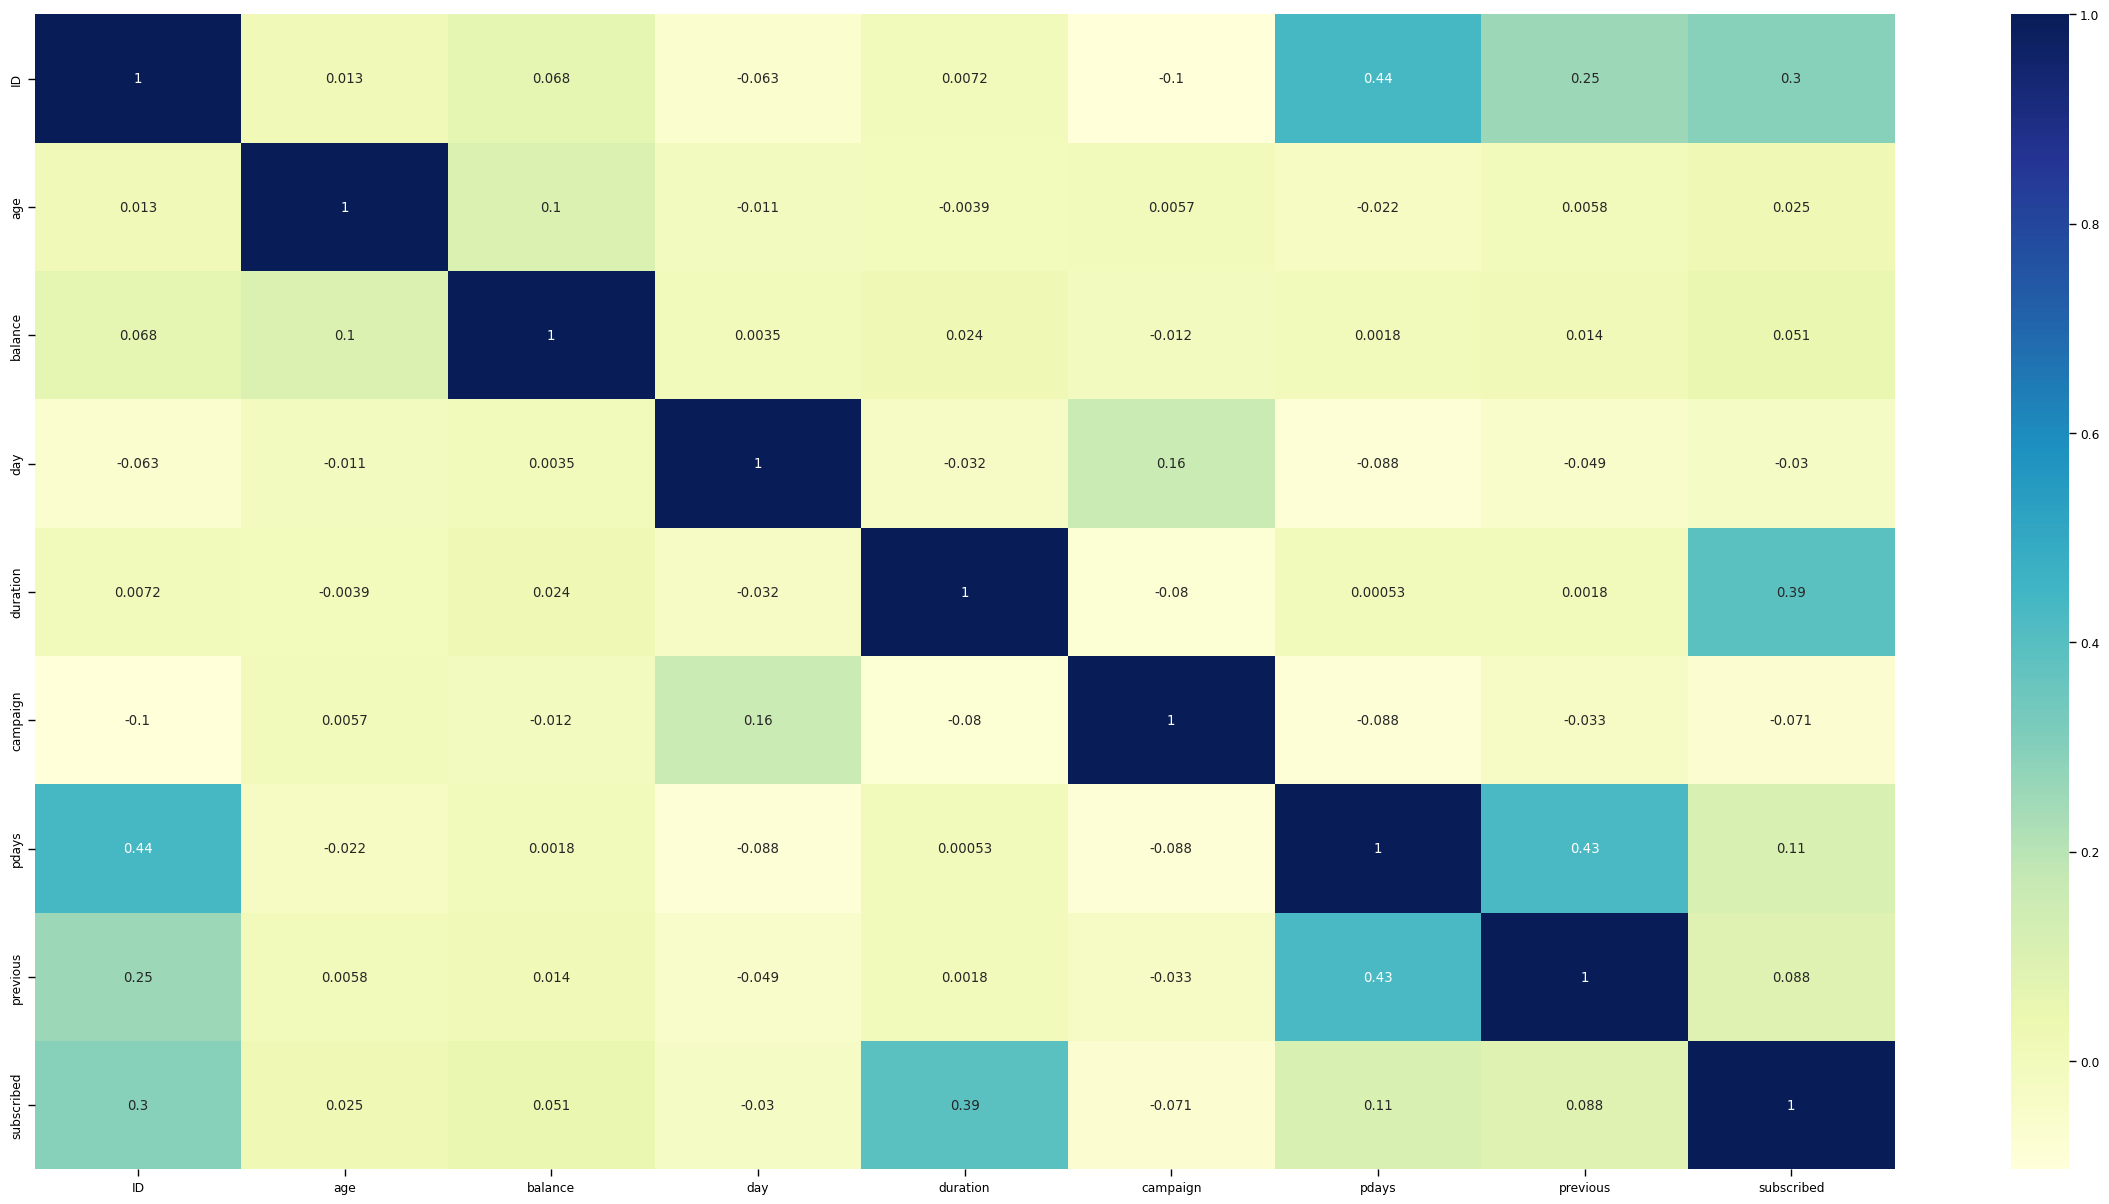

In [31]:
fig,ax= plt.subplots()
fig.set_size_inches(30,15)
sns.heatmap(tc, annot=True, cmap='YlGnBu')

The data shows that longer call duration is correlated with the target variable. Customers with longer call durations should be more interested in joining the term deposit plan.

In [32]:
target = df_train['subscribed']
df_train = df_train.drop('subscribed', axis=1)

In [33]:
#generating dummy values on the train dataset
df_train = pd.get_dummies(df_train)
df_train.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,0,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Splitting the data into train and validation set keeping 20% of the dataset as our validation set and the rest as our training set.

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_val, y_train, y_val = train_test_split(df_train, target, test_size=0.2, random_state=12)

In [36]:
#checking the performance of the model through LogisticRegression
from sklearn.linear_model import LogisticRegression

In [37]:
#creating an object of logistic regression model
lreg = LogisticRegression()

In [38]:
#fitting the data into the model
lreg.fit(X_train,y_train)

LogisticRegression()

In [39]:
#Making predictions on the validation set
pred = lreg.predict(X_val)

In [41]:
#checking accuracy
from sklearn.metrics import accuracy_score

In [42]:
#Calculating the accuracy score
accuracy_score(y_val,pred)

0.8913112164296998

We got an accuracy of around 89%, logistic regression has a linear decision boundary. 

Now we need a model that can capture this non linearity, we can proceed using Decision Tree algorithm to for dealing with non-linearity.

In [43]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, random_state=0)

#fitting the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [44]:
DecisionTreeClassifier(max_depth=4, random_state=0)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [45]:
#making predictions on the validation set
predict = clf.predict(X_val)
predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [46]:
#Calculating the accuracy
accuracy_score(y_val,predict)

0.9042654028436019

Now, we got the 90% accuracy, we can make prediction based on the investigation above on the data.

In [48]:
df_test = pd.get_dummies(df_test)
df_test.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,38441,32,118,15,20,6,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,40403,78,2787,1,372,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3709,31,144,16,676,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,37422,57,3777,13,65,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,12527,45,-705,3,111,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [54]:
test_pred = clf.predict(df_test)
test_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [49]:
submissions = pd.DataFrame()

In [56]:
submissions['ID'] = df_test['ID']
submissions['subscribed'] = test_pred

In [57]:
submissions['subscribed']

0        0
1        1
2        0
3        0
4        0
        ..
13559    0
13560    0
13561    0
13562    1
13563    0
Name: subscribed, Length: 13564, dtype: int64

Since the target variable is yes or no, we will convert 1 and 0 in the predictions to yes and no respectively.

In [58]:
submissions['subscribed'].replace(0,'no',inplace=True)
submissions['subscribed'].replace(1,'yes',inplace=True)

In [59]:
submissions['subscribed']

0         no
1        yes
2         no
3         no
4         no
        ... 
13559     no
13560     no
13561     no
13562    yes
13563     no
Name: subscribed, Length: 13564, dtype: object

In [60]:
submissions.to_csv('submission file.csv', header=True, index=False)